## Kaggle Competition for House Prices: Advanced Regression Techniques 

In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
print("Shape of Train:", train.shape)
print("Shape of Test:", test.shape)

In [ ]:
train.head()

In [ ]:
test.head(10)

In [ ]:
## Concat train and test data set
df=pd.concat((train,test))
temp_df=df
print("Shape of df:", df.shape)

# Exploratory Data Analysis

In [ ]:
pd.set_option("display.max_columns",2000)
pd.set_option("display.max_rows",85)

In [ ]:
df.head(6)

In [ ]:
df.tail(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.select_dtypes(include=['int64','float64']).columns

In [ ]:
df.select_dtypes(include=['object']).columns

In [ ]:
df=df.set_index("Id")

In [ ]:
df.head(6)

### Show the Null Values using heatmap

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [ ]:
#gte the Percentage of null values
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent

In [ ]:
col_for_drop=null_percent[null_percent > 50].keys()
col_for_drop

In [ ]:
df=df.drop(col_for_drop,"columns")

In [ ]:
df.shape

In [ ]:
#find the unique value count
for i in df.columns:
    print(i + "\t" + str(len(df[i].unique())))

In [ ]:
# Describe the target
train["SalePrice"].describe()

In [ ]:
# Plot the distplot of target
plt.figure(figsize=(10,8))
bar=sns.distplot(train["SalePrice"])
bar.legend(["Skewness:{:.2f}".format(train['SalePrice'].skew())])

# Correlation Heatmap

In [ ]:
plt.figure(figsize=(25,25))
ax=sns.heatmap(train.corr(),cmap="coolwarm",annot=True,linewidth=2)

#to fix the bug first and last row cut in half of heatmap plot
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

In [ ]:
## correlation heatmap of highly correlated features with SalePrice
hig_corr=train.corr()
hig_corr_features=hig_corr.index[abs(hig_corr["SalePrice"]) >=0.5 ]
hig_corr_features

In [ ]:
plt.figure(figsize=(15,10))
ax=sns.heatmap(train[hig_corr_features].corr(),cmap="coolwarm",annot=True,linewidth=3)

#to fix the bug first and last row cut in half of heatmap plot
bottom,top=ax.get_ylim()
ax.set_ylim(bottom +0.5, top-0.5)

In [ ]:
#Plot regplot to get the nature of highly corelated data
plt.figure(figsize=(16,9))
for i in range(len(hig_corr_features)):
    if i<=9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace=0.5,wspace=0.5)
        sns.regplot(data=train,x=hig_corr_features[i],y='SalePrice')

## Handling Missing Value

In [ ]:
missing_col=df.columns[df.isnull().any()]
missing_col

In [ ]:
## Handling missing value of Bsmt feature
bsmt_col=[ 'BsmtQual', 'BsmtCond', 'BsmtExposure',
 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
 'BsmtFullBath', 'BsmtHalfBath']

In [ ]:
bsmt_feat=df[bsmt_col]
bsmt_feat

In [ ]:
## Fill Missing Values
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [ ]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtFinSF1']=df['BsmtFinSF1'].fillna(df['BsmtFinSF1'].mode()[0])
df['BsmtFinSF2']=df['BsmtFinSF2'].fillna(df['BsmtFinSF2'].mode()[0])
df['BsmtUnfSF']=df['BsmtUnfSF'].fillna(df['BsmtUnfSF'].mode()[0])
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna(df['TotalBsmtSF'].mode()[0])
df['BsmtFullBath']=df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['BsmtHalfBath']=df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])

In [ ]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])


In [ ]:
df['GarageCars']=df['GarageCars'].fillna(df['GarageCars'].mode()[0])
df['GarageArea']=df['GarageArea'].fillna(df['GarageArea'].mode()[0])

In [ ]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [ ]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [ ]:
df.isnull().sum()

In [ ]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [ ]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [ ]:
df.shape

In [ ]:
df.head()

## Handling Categorical Features

In [ ]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [ ]:
len(columns)

In [ ]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [ ]:
final_df=df

In [ ]:
final_df['SalePrice']

In [ ]:
final_df.shape

In [ ]:
final_df=category_onehot_multcols(columns)

In [ ]:
final_df.shape

In [ ]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [113]:
final_df.shape

(2919, 29)

In [ ]:
final_df

In [ ]:
final_df.columns[final_df.isnull().any()]

In [112]:
final_df.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.000000,8450,7,5,2003,2003,196.0,706.0,150.0,856.0,856,854,1710,1.0,2,1,3,1,8,0,2.0,548.0,0,61,0,0,0,208500.0
2,20,80.000000,9600,6,8,1976,1976,0.0,978.0,284.0,1262.0,1262,0,1262,0.0,2,0,3,1,6,1,2.0,460.0,298,0,0,0,0,181500.0
3,60,68.000000,11250,7,5,2001,2002,162.0,486.0,434.0,920.0,920,866,1786,1.0,2,1,3,1,6,1,2.0,608.0,0,42,0,0,0,223500.0
4,70,60.000000,9550,7,5,1915,1970,0.0,216.0,540.0,756.0,961,756,1717,1.0,1,0,3,1,7,1,3.0,642.0,0,35,272,0,0,140000.0
5,60,84.000000,14260,8,5,2000,2000,350.0,655.0,490.0,1145.0,1145,1053,2198,1.0,2,1,4,1,9,1,3.0,836.0,192,84,0,0,0,250000.0
6,50,85.000000,14115,5,5,1993,1995,0.0,732.0,64.0,796.0,796,566,1362,1.0,1,1,1,1,5,0,2.0,480.0,40,30,0,0,0,143000.0
7,20,75.000000,10084,8,5,2004,2005,186.0,1369.0,317.0,1686.0,1694,0,1694,1.0,2,0,3,1,7,1,2.0,636.0,255,57,0,0,0,307000.0
8,60,69.305795,10382,7,6,1973,1973,240.0,859.0,216.0,1107.0,1107,983,2090,1.0,2,1,3,1,7,2,2.0,484.0,235,204,228,0,0,200000.0
9,50,51.000000,6120,7,5,1931,1950,0.0,0.0,952.0,952.0,1022,752,1774,0.0,2,0,2,2,8,2,2.0,468.0,90,0,205,0,0,129900.0


## Feature Engineering / Selection to improve Accuracy

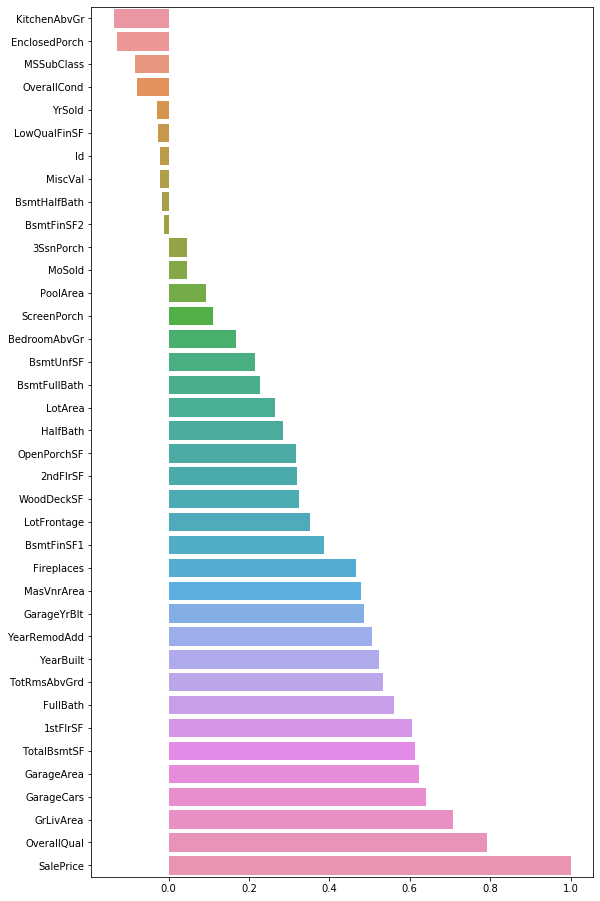

In [106]:
# correlation Barplot
plt.figure(figsize=(9,16))
corr_feat_series=pd.Series.sort_values(train.corrwith(train.SalePrice))
sns.barplot(x=corr_feat_series,y=corr_feat_series.index,orient='h')

In [108]:
# These columns are not importatnt.
fe_col_for_drop=['YrSold','LowQualFinSF','MiscVal','BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold']

In [109]:
final_df=final_df.drop(fe_col_for_drop,"columns")

In [111]:
final_df.shape

(2919, 29)

In [114]:
final_df.to_csv('houseprice.csv',index=False)

In [ ]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [ ]:
df_Train.head()

In [ ]:
df_Train.tail()

In [ ]:
df_Train.shape

In [ ]:
df_Test.head()

In [ ]:
df_Train.shape

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']


## Prediciton and selecting the Algorithm

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()

In [ ]:
import xgboost
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)

In [ ]:
random_cv.best_estimator_

In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
regressor.fit(X_train,y_train)

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Test.shape

In [ ]:
df_Test.head()

In [ ]:
df_Test.drop(['SalePrice'],axis=1).head()

In [ ]:
y_pred=regressor.predict(df_Test.drop(['SalePrice'],axis=1))

In [ ]:
y_pred

In [ ]:
##Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(ann_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)

## Step2

In [ ]:
pred.columns=['SalePrice']

In [ ]:
temp_df=df_Train['SalePrice'].copy()

In [ ]:
temp_df.column=['SalePrice']

In [ ]:
df_Train.drop(['SalePrice'],axis=1,inplace=True)

In [ ]:
df_Train=pd.concat([df_Train,temp_df],axis=1)

In [ ]:
df_Test.head()

In [ ]:
df_Test=pd.concat([df_Test,pred],axis=1)

In [ ]:
df_Train=pd.concat([df_Train,df_Test],axis=0)

In [ ]:
df_Train.shape

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

## Artificial Neural Network Implementation

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss=root_mean_squared_error, optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [ ]:
ann_pred=classifier.predict(df_Test.drop(['SalePrice'],axis=1).values)

In [ ]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))